# **Linear Regression**


In [ ]:
import pandas as pd
# import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel(r"Crime Data.xls")
df

,State,Violent Crime Rate,Murder Rate,% Urban,% White,% HS Grad,% Poverty,% Single Parent Household
0,AK,7.61,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,7.80,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,5.93,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,7.15,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,10.78,13.1,96.7,79.3,76.2,18.2,12.5
5,CO,5.67,5.8,81.8,92.5,84.4,9.9,12.1
6,CT,4.56,6.3,95.7,89.0,79.2,8.5,10.1
7,DE,6.86,5.0,82.7,79.4,77.5,10.2,11.4
8,FL,12.06,8.9,93.0,83.5,74.4,17.8,10.6
9,GA,7.23,11.4,67.7,70.8,70.9,13.5,13.0


## **Correlation Matrix:**

<ipython-input-3-48c89398926d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = round(df.corr(),2)


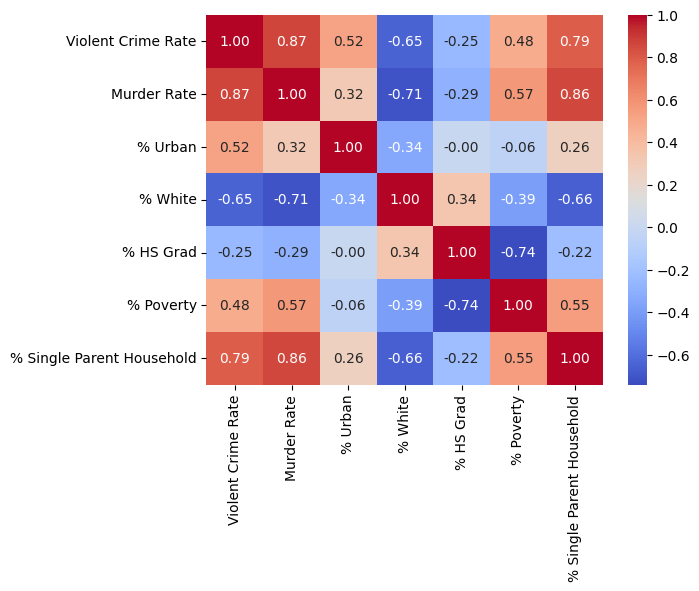

In [ ]:
correlation_matrix = round(df.corr(),2)
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## **Scatter plots with regression line for Violent Crime Rate as the response variable:**

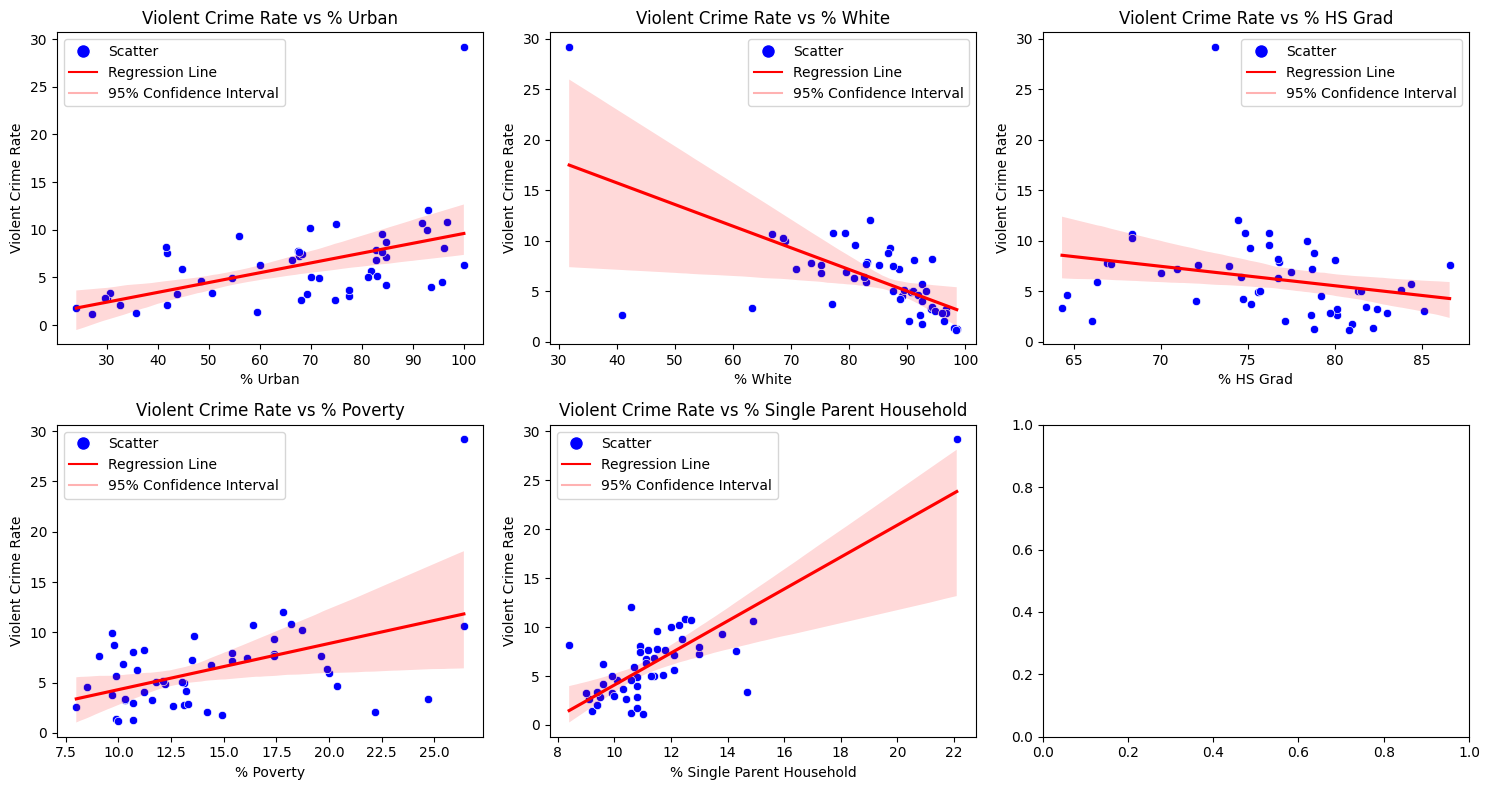

In [ ]:
#Grid size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# x values
variables = ['% Urban', '% White', '% HS Grad', '% Poverty', '% Single Parent Household']


for i, (ax, variable) in enumerate(zip(axs.flatten(), variables)):

    # Scatter plot
    scatter = sns.scatterplot(data=df, x=variable, y='Violent Crime Rate', ax=ax, color='blue', label='Scatter')

    # Regression line
    regplot = sns.regplot(data=df, x=variable, y='Violent Crime Rate', ax=ax, scatter=False, color='red', label='Regression Line')

    ax.set_title(f'Violent Crime Rate vs {variable}')

    # Custom legend
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Scatter'),
                     plt.Line2D([0], [0], linestyle='-', color='red', label='Regression Line'),
                     plt.Line2D([0], [0], linestyle='-', color='red', label='95% Confidence Interval', alpha=0.3)]

    ax.legend(handles=custom_legend)

# Prevent overlapping
plt.tight_layout()

plt.show()

## **Scatter plots with regression line for Murder Rate as the response variable:**

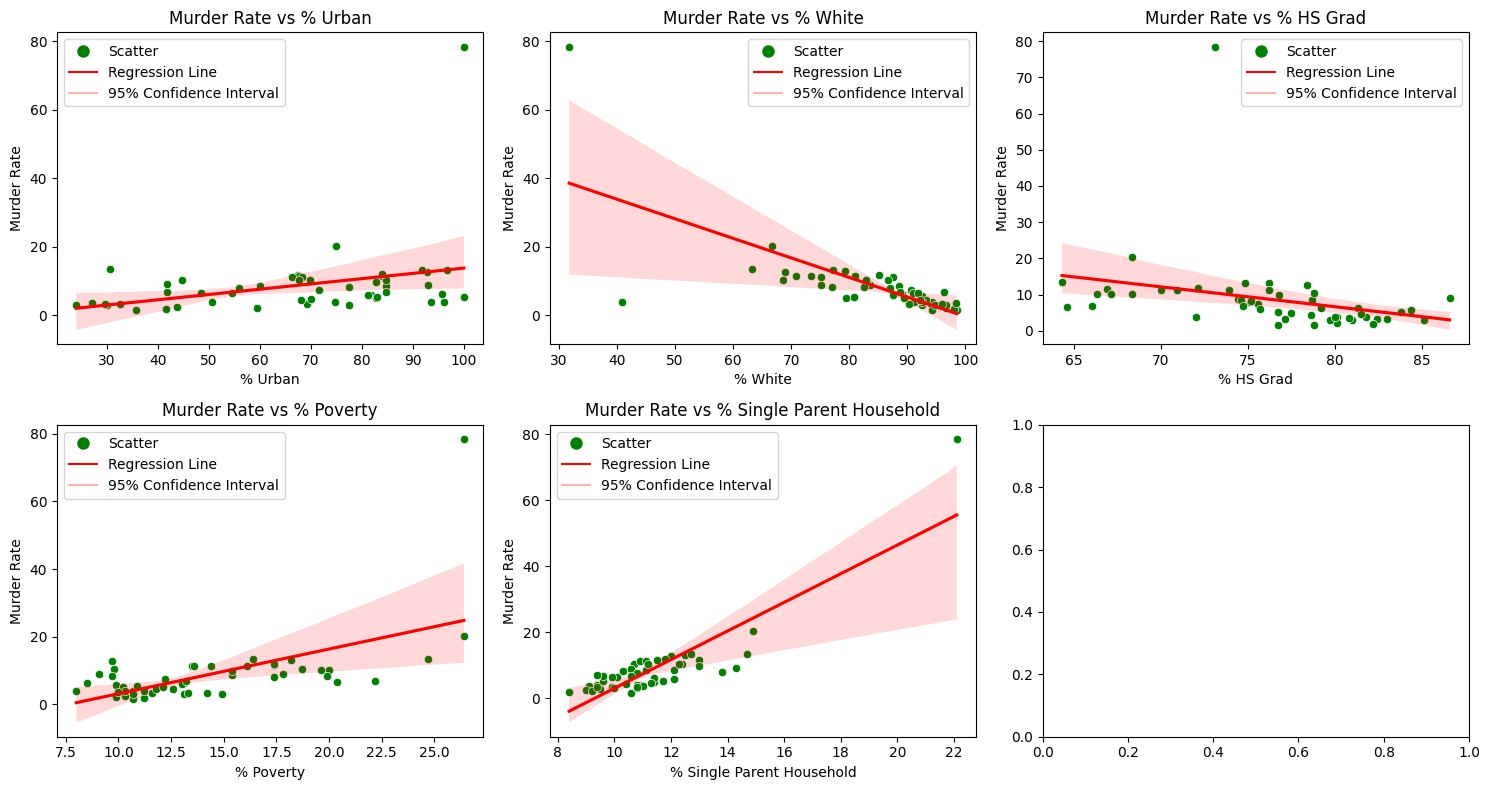

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

variables = ['% Urban', '% White', '% HS Grad', '% Poverty', '% Single Parent Household']

for i, (ax, variable) in enumerate(zip(axs.flatten(), variables)):

    scatter = sns.scatterplot(data=df, x=variable, y='Murder Rate', ax=ax, color='green', label='Scatter')

    regplot = sns.regplot(data=df, x=variable, y='Murder Rate', ax=ax, scatter=False, color='red', label='Regression Line')

    ax.set_title(f'Murder Rate vs {variable}')

    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Scatter'),
                     plt.Line2D([0], [0], linestyle='-', color='red', label='Regression Line'),
                     plt.Line2D([0], [0], linestyle='-', color='red', label='95% Confidence Interval', alpha=0.3)]

    ax.legend(handles=custom_legend)

plt.tight_layout()
plt.show()

## ***Full* multiple linear regression model with *all* predictors for Violent Crime Rate:**

In [ ]:
x = df[['% Urban', '% White', '% HS Grad', '% Poverty', '% Single Parent Household']]
y = df['Violent Crime Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Violent Crime Rate   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.29
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           4.21e-13
Time:                        22:40:57   Log-Likelihood:                -110.09
No. Observations:                  51   AIC:                             232.2
Df Residuals:                      45   BIC:                             243.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -15.3367      8.280     -1.852      0.071     -32.014       1.340
% Urban                       0.0711      0.016      4.433      0.000       0.039       0.103
% White                      -0.0479      0.034     -1.393      0.170      -0.117       0.021
% HS Grad                     0.0788      0.097      0.813      0.420      -0.116       0.274
% Poverty                     0.2421      0.137      1.765      0.084      -0.034       0.519
% Single Parent Household     1.0040      0.252      3.983      0.000       0.496       1.512
==============================================================================
Omnibus:                       15.042   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               32.247
Skew:                           0.729   Prob(JB):                     9.94e-08
Kurtosis:                       6.612   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared for the full model is 0.7650** which means that alll available explanatory variable can explain 76.5% of the variation in our target/response variable (Violent Crime Rate). From the above results, we see that the P-values for % White and % HS Grad are well above the 0.05 significance value. This means that we fail to reject H0 of statistical independency of those variables from Violent Crime Rate. Their corresponding t-values of -1.39 and 0.81 don't deviate much from zero and thus don't add a significant weight to the overall prediction equation. So we can consider dropping them to make our model simpler.

## **Trimmed model (dropped % White and % HS Grad):**

In [ ]:
x = df[['% Urban', '% Poverty', '% Single Parent Household']]
y = df['Violent Crime Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Violent Crime Rate   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     48.03
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           2.36e-14
Time:                        21:45:30   Log-Likelihood:                -111.25
No. Observations:                  51   AIC:                             230.5
Df Residuals:                      47   BIC:                             238.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -15.1138      1.813     -8.335      0.000     -18.762     -11.466
% Urban                       0.0740      0.015      4.806      0.000       0.043       0.105
% Poverty                     0.1661      0.085      1.951      0.057      -0.005       0.337
% Single Parent Household     1.2375      0.190      6.508      0.000       0.855       1.620
==============================================================================
Omnibus:                       16.012   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.443
Skew:                           0.862   Prob(JB):                     2.45e-07
Kurtosis:                       6.370   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared for the above model is 0.754** which means there was only a 1.1% drop from the full model. A P-value of 0.057 for % Poverty suggests we can consider dropping that variable as well.

## **Trimmed model (dropped % White, % HS Grad and % Poverty):**

In [ ]:
x = df[['% Urban', '% Single Parent Household']]
y = df['Violent Crime Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Violent Crime Rate   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     66.26
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.56e-14
Time:                        21:53:07   Log-Likelihood:                -113.24
No. Observations:                  51   AIC:                             232.5
Df Residuals:                      48   BIC:                             238.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -14.6965      1.853     -7.933      0.000     -18.421     -10.972
% Urban                       0.0664      0.015      4.334      0.000       0.036       0.097
% Single Parent Household     1.4547      0.159      9.173      0.000       1.136       1.774
==============================================================================
Omnibus:                       13.910   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.428
Skew:                           0.931   Prob(JB):                     9.96e-05
Kurtosis:                       5.281   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared for the above model is 0.734** which means there was a further drop of 2% and an overall drop of 3.1% from the full model. Let's try dropping % Urban since its t-value is less than half of the t-value of % Single Parent Household.

## **Trimmed model (keeping only % Single Parent Household):**

In [ ]:
x = df[['% Single Parent Household']]
y = df['Violent Crime Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Violent Crime Rate   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     83.46
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           3.71e-12
Time:                        21:59:17   Log-Likelihood:                -121.66
No. Observations:                  51   AIC:                             247.3
Df Residuals:                      49   BIC:                             251.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -12.2438      2.059     -5.946      0.000     -16.382      -8.105
% Single Parent Household     1.6332      0.179      9.135      0.000       1.274       1.993
==============================================================================
Omnibus:                        5.311   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                7.113
Skew:                           0.047   Prob(JB):                       0.0285
Kurtosis:                       4.827   Cond. No.                         63.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared for the above model is 0.63** which means there was a further drop of 10.4% and an overall drop of 13.5% from the full model. This suggests that % Urban has a significant effect on the prediction equation and should not be dropped.

## **Trimmed model (keeping only % Urban):**

In [ ]:
x = df[['% Urban']]
y = df['Violent Crime Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Violent Crime Rate   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     17.94
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           0.000100
Time:                        05:31:19   Log-Likelihood:                -139.06
No. Observations:                  51   AIC:                             282.1
Df Residuals:                      49   BIC:                             286.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6822      1.721     -0.396      0.693      -4.140       2.775
% Urban        0.1029      0.024      4.236      0.000       0.054       0.152
==============================================================================
Omnibus:                       57.045   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.330
Skew:                           2.792   Prob(JB):                     7.21e-93
Kurtosis:                      15.981   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared for the above model is 0.268** which is a considerable drop-off.

Although, % Poverty and % White have a decent amount of correlation with Violent Murder Rate individually, they don't add much weight to the prediction equation as seen from their t-values and their effects on the R-squared value. Even though % Poverty is on the border of independency, it is heavily correlated with % HS Grad (r = -0.74) and since % HS Grad can be dropped, we can drop % Poverty too. This is also backed up by the R-squared value.

*In conclusion*, we can consider **dropping % White, % HS Grad and % Poverty while keeping % Urban and % Single Parent Household** as explantory variables for our multiple linear regression equation to predict our explanatory variable that is Violent Crime Rate.

## ***Full* multiple linear regression model with *all* predictors for Murder Rate:**

In [ ]:
x = df[['% Urban', '% White', '% HS Grad', '% Poverty', '% Single Parent Household']]
y = df['Murder Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Murder Rate   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     34.97
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.98e-14
Time:                        04:54:05   Log-Likelihood:                -152.38
No. Observations:                  51   AIC:                             316.8
Df Residuals:                      45   BIC:                             328.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -33.7314     18.972     -1.778      0.082     -71.943       4.480
% Urban                       0.0510      0.037      1.389      0.172      -0.023       0.125
% White                      -0.1959      0.079     -2.485      0.017      -0.355      -0.037
% HS Grad                     0.1996      0.222      0.899      0.373      -0.248       0.647
% Poverty                     0.5814      0.314      1.849      0.071      -0.052       1.215
% Single Parent Household     2.8247      0.578      4.891      0.000       1.661       3.988
==============================================================================
Omnibus:                       25.099   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.634
Skew:                           1.208   Prob(JB):                     1.02e-16
Kurtosis:                       8.368   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared for the full model is 0.795** which means that alll available explanatory variable can explain 79.5% of the variation in our target/response variable (Murder Rate). From the above results, we see that the P-values for % Urban and % HS Grad are well above the 0.05 significance value. This means that we fail to reject H0 of statistical independency of those variables from Murder Rate. Their corresponding t-values of 1.39 and 0.89 don't deviate much from zero and thus don't add a significant weight to the overall prediction equation. So we can consider dropping them to make our model simpler.

## **Trimmed model (dropped % Urban and % HS Grad):**

In [ ]:
x = df[['% White', '% Poverty', '% Single Parent Household']]
y = df['Murder Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Murder Rate   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     56.95
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.10e-15
Time:                        04:54:48   Log-Likelihood:                -153.72
No. Observations:                  51   AIC:                             315.4
Df Residuals:                      47   BIC:                             323.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -14.9296     10.290     -1.451      0.153     -35.631       5.772
% White                      -0.1971      0.073     -2.709      0.009      -0.343      -0.051
% Poverty                     0.2931      0.190      1.546      0.129      -0.088       0.675
% Single Parent Household     3.1832      0.501      6.359      0.000       2.176       4.190
==============================================================================
Omnibus:                       23.675   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.318
Skew:                           1.009   Prob(JB):                     2.97e-19
Kurtosis:                       9.007   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared for the above model is 0.784** which means there was only a 1.1% drop from the full model. A P-value of 0.129 for % Poverty suggests we can consider dropping that variable as well.

## **Trimmed model (dropped % Urban, % HS Grad and % Poverty):**

In [ ]:
x = df[['% White', '% Single Parent Household']]
y = df['Murder Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Murder Rate   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     81.86
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           3.40e-16
Time:                        05:05:44   Log-Likelihood:                -154.98
No. Observations:                  51   AIC:                             316.0
Df Residuals:                      48   BIC:                             321.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -14.0133     10.421     -1.345      0.185     -34.965       6.939
% White                      -0.2022      0.074     -2.744      0.009      -0.350      -0.054
% Single Parent Household     3.5096      0.460      7.623      0.000       2.584       4.435
==============================================================================
Omnibus:                       20.485   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.818
Skew:                           0.929   Prob(JB):                     1.69e-13
Kurtosis:                       7.922   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared for the above model is 0.773** which means there was a further drop of 1.1% and an overall drop of 2.2% from the full model. Let's try dropping % White since its t-value is so much lesser than the t-value of % Single Parent Household.

## **Trimmed model (keeping only % Single Parent Household):**

In [ ]:
x = df[['% Single Parent Household']]
y = df['Murder Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Murder Rate   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           7.54e-16
Time:                        05:17:54   Log-Likelihood:                -158.70
No. Observations:                  51   AIC:                             321.4
Df Residuals:                      49   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -40.4153      4.257     -9.493      0.000     -48.971     -31.860
% Single Parent Household     4.3391      0.370     11.740      0.000       3.596       5.082
==============================================================================
Omnibus:                       20.505   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.180
Skew:                           0.956   Prob(JB):                     6.32e-13
Kurtosis:                       7.773   Cond. No.                         63.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared for the above model is 0.738** which means there was a further drop of 3.5% and an overall drop of 5.7% from the full model.

## **Trimmed model (keeping only % White):**

In [ ]:
x = df[['% White']]
y = df['Murder Rate']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Murder Rate   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     48.77
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           7.04e-09
Time:                        05:18:10   Log-Likelihood:                -175.21
No. Observations:                  51   AIC:                             354.4
Df Residuals:                      49   BIC:                             358.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7660      6.962      8.153      0.000      42.775      70.757
% White       -0.5712      0.082     -6.983      0.000      -0.736      -0.407
==============================================================================
Omnibus:                       46.365   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.991
Skew:                           1.680   Prob(JB):                    1.46e-145
Kurtosis:                      20.395   Cond. No.                         552.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared for the above model is 0.499** which is a considerable drop-off.

Even though % White has a strong correlation with Murder Rate (-0.71) individually, it is also a moderately strong correlation of -0.66 with % Single Parent Household individually. That combined with the fact that the R-squared value drops significantly when using only % White but not when using only % Single Parent Household means that we shall choose the **model keeping only % Single Parent Household as the best model to predict Murder Rate**